In [1]:
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt 
import base64
from PIL import Image
import io
import math 
from math import sqrt
%matplotlib inline

global embed
saved_model_path = 'E:\Graduation Project\Datasets\PRE TRAINED MOBILE NET'
embed = hub.KerasLayer(saved_model_path)

## CONVERTING IMAGES TO FEATURE VECTORS (EMBEDDINGS)

In [2]:
class TensorVector(object):

    def __init__(self, FileName=None):
        self.FileName = FileName

    def process(self):

        img = tf.io.read_file(self.FileName)
        img = tf.io.decode_jpeg(img, channels=3)
        img = tf.image.resize_with_pad(img, 224, 224)
        img = tf.image.convert_image_dtype(img,tf.float32)[tf.newaxis, ...]
        features = embed(img)
        feature_set = np.squeeze(features)
        return list(feature_set)

## convert Images into base64 

In [3]:
def convertBase64(FileName):
    """
    Return the Numpy array for a image 
    """
    with open(FileName, "rb") as f:
        data = f.read()
        
    res = base64.b64encode(data)
    
    base64data = res.decode("UTF-8")
    
    imgdata = base64.b64decode(base64data)
    
    image = Image.open(io.BytesIO(imgdata))
    
    return np.array(image)

## function to find the cosine similarity between feature vectors

In [4]:
def cosineSim(a1,a2):
    sum = 0
    suma1 = 0
    sumb1 = 0
    for i,j in zip(a1, a2):
        suma1 += i * i
        sumb1 += j*j
        sum += i*j
    cosine_sim = sum / ((sqrt(suma1))*(sqrt(sumb1)))
    return cosine_sim

## Path Of Main Uploaded Image

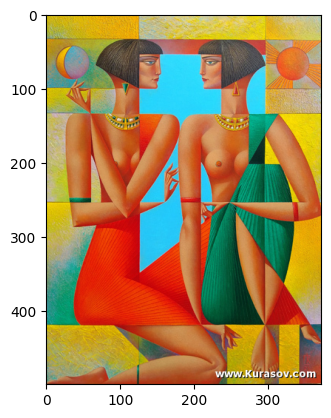

In [35]:
img1_path = "E:/Graduation Project/ARTWORKS IMPLEMENTATIONS/query test dataset/000002.jpg"
plt.imshow(convertBase64(img1_path))

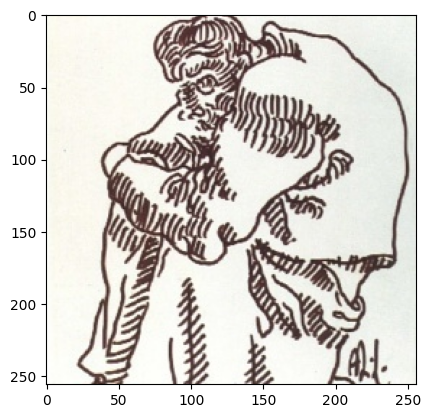

In [44]:
img2_path = "E:/Graduation Project/ARTWORKS IMPLEMENTATIONS/query test dataset/000007.jpg"
plt.imshow(convertBase64(img2_path))

## getting feature vector of the main uploaded image

In [45]:
helper = TensorVector(img1_path)
vector1 = helper.process()
len(vector1)

1280

## getting feature vector of the second image

In [46]:
helper2 = TensorVector(img2_path)
vector2 = helper2.process()
len(vector2)

1280

In [47]:
print(cosineSim(vector1, vector2))

0.8039254171973763
